# **Title:**

#        **ITSM Improvement through Machine Learning: Enhancing Incident Managementm at ABC Tech.**

## **PROBLEM** **OF** **STATEMENT:**

*   Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

*   Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

*    Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

*    Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

# **Description:**
## **Business Case Description:**

ABC Tech is an established mid-sized organization operating in the IT-enabled business sector for over a decade. They manage a significant volume of IT incidents and tickets, averaging between 22,000 to 25,000 per year. ABC Tech follows best practices in IT Service Management (ITSM), including incident management, problem management, change management, and configuration management processes. These ITIL practices have matured over time, reaching a high level of process maturity.

Recently, ABC Tech conducted an audit that indicated that further improvement initiatives in their ITSM processes may not provide a sufficient return on investment (ROI). Despite their mature processes, customer feedback from recent surveys has revealed that incident management, in particular, is rated poorly, suggesting there is room for enhancement.

In response to these challenges, ABC Tech's management has decided to explore the potential of machine learning (ML) to enhance their ITSM processes. After attending a Machine Learning conference focused on IT Service Management (ITSM), they identified four key areas where ML can contribute to improving ITSM processes within the organization:

1. **Predicting High Priority Tickets:** ABC Tech aims to develop an ML model that can predict high-priority tickets, specifically those categorized as priority 1 and 2. This prediction will allow them to take proactive measures to address issues or incidents before they escalate.

2. **Forecasting Incident Volume:** The organization plans to use ML to forecast the incident volume in different fields on a quarterly and annual basis. This predictive capability will help them better allocate resources and plan for the required technology upgrades.

3. **Auto-Tagging Tickets:** ABC Tech intends to implement a text classification ML model to automatically assign correct priorities and departments to incoming tickets. This automation will reduce reassignment and related delays in ticket handling.

4. **Predicting RFC and ITSM Asset Misconfigurations:** The organization aims to create predictive models for Request for Change (RFC) and detect potential failures or misconfigurations in ITSM assets. Identifying these issues in advance will help in preventing disruptions and improving overall ITSM asset management.

The dataset that ABC Tech plans to use for these ML initiatives comprises a total of approximately 46,000 records spanning the years 2012, 2013, and 2014. The data is stored in a MySQL database with read-only access, and the relevant connection details are provided.

Here's a summary of some key fields in the dataset:

- CI_Name: Configuration Item Name
- CI_Cat: Configuration Item Category
- CI_Subcat: Configuration Item Subcategory
- Incident_ID: Incident Identifier
- Status: Incident Status (e.g., Closed)
- Impact: Impact level
- Urgency: Urgency level
- Priority: Incident Priority
- Category: Incident Category
- KB_number: Knowledge Base Number
- Alert_Status: Alert Status
- No_of_Reassignments: Number of Reassignments
- Open_Time: Incident Open Time
- Reopen_Time: Incident Reopen Time
- Resolved_Time: Incident Resolved Time
- Close_Time: Incident Close Time
- Handle_Time_hrs: Time taken to handle the incident (in hours)
- Closure_Code: Code for incident closure
- No_of_Related_Interactions: Number of Related Interactions
- Related_Interaction: Identifier for Related Interaction
- No_of_Related_Incidents: Number of Related Incidents
- No_of_Related_Changes: Number of Related Changes
- Related_Change: Identifier for Related Change


## **Basic Checks**

## **Import Basic Libraries:**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## **Load Data:**

In [3]:
data=pd.read_csv("Data/ITSM_data.csv")

In [4]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [5]:
data.shape

(46606, 25)

In [6]:
data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [9]:
data.dtypes

CI_Name                        object
CI_Cat                         object
CI_Subcat                      object
WBS                            object
Incident_ID                    object
Status                         object
Impact                         object
Urgency                        object
Priority                      float64
number_cnt                    float64
Category                       object
KB_number                      object
Alert_Status                   object
No_of_Reassignments           float64
Open_Time                      object
Reopen_Time                    object
Resolved_Time                  object
Close_Time                     object
Handle_Time_hrs                object
Closure_Code                   object
No_of_Related_Interactions    float64
Related_Interaction            object
No_of_Related_Incidents       float64
No_of_Related_Changes         float64
Related_Change                 object
dtype: object

In [10]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Priority,45226.0,4.215805,0.705624,1.000000,4.000000,4.000000,5.000000,5.000000
number_cnt,46606.0,0.499658,0.288634,0.000023,0.248213,0.500269,0.749094,0.999997
No_of_Reassignments,46605.0,1.131831,2.269774,0.000000,0.000000,0.000000,2.000000,46.000000
No_of_Related_Interactions,46492.0,1.149897,2.556338,1.000000,1.000000,1.000000,1.000000,370.000000
No_of_Related_Incidents,1222.0,1.669394,3.339687,1.000000,1.000000,1.000000,1.000000,63.000000
No_of_Related_Changes,560.0,1.058929,0.403596,1.000000,1.000000,1.000000,1.000000,9.000000


In [12]:
data.describe(include="object")

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46606,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,46606,2284,44826,46606,46605,46146,46606,560
unique,3019,12,64,274,46606,2,6,11,4,1825,1,34636,2244,33627,34528,30638,14,43060,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,incident,KM0001106,closed,24-03-2014 08:54,29-10-2013 15:03,10/10/2013 12:53,2/10/2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,3050,32900,18811,13342,1,46597,22556,15526,37748,1106,46606,7,2,7,21,236,16470,3434,110


In [13]:
data.sample(5)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
5047,SUB000424,subapplication,Web Based Application,WBS000073,IM0005181,Closed,5,5,5.0,0.310589,...,NaN,17-10-2013 15:56,17-10-2013 15:56,"34,42",Data,1.0,SD0012814,NaN,NaN,NaN
6664,APP000004,application,Citrix,WBS000098,IM0006816,Closed,4,4,4.0,0.707604,...,NaN,24-10-2013 09:02,24-10-2013 09:03,"2,99,72,77,778",Other,1.0,SD0017726,NaN,NaN,NaN
30714,SBA000759,application,Server Based Application,WBS000296,IM0030999,Closed,3,3,3.0,0.666685,...,NaN,24-01-2014 14:39,24-01-2014 14:39,"0,373611111",User error,1.0,SD0094214,NaN,NaN,NaN
17250,SBA000072,application,Server Based Application,WBS000244,IM0017466,Closed,4,4,4.0,0.447431,...,NaN,28-11-2013 08:45,28-11-2013 08:46,"2,36,69,44,444",User error,1.0,SD0050101,NaN,NaN,NaN
7345,SBA000607,application,Server Based Application,WBS000263,IM0007502,Closed,5,5,5.0,0.222536,...,NaN,24-10-2013 08:47,24-10-2013 08:47,"1,17,95,83,333",Other,1.0,SD0019605,NaN,NaN,NaN


# **Data Preprocessing**

In [14]:
data.drop(["CI_Name", "WBS", "Incident_ID", "KB_number", "Related_Interaction","Related_Change","Open_Time","Close_Time","Resolved_Time","Handle_Time_hrs"], axis=1, inplace=True)

In [15]:
cat_data=data.select_dtypes(include=["O"]).columns
cat_data

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Category',
       'Alert_Status', 'Reopen_Time', 'Closure_Code'],
      dtype='object')

In [16]:
for i in cat_data:
  print(i,data[i].unique())
  print(data[i].value_counts())
  print("----------------------------")

CI_Cat ['subapplication' 'application' 'computer' nan 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']
CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64
----------------------------
CI_Subcat ['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' nan 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 'MigratieDummy' 'Sca

In [17]:
num_data=data.select_dtypes(include=["float64","int64"]).columns
num_data

Index(['Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

Unique value will be 1 for constant column.Here, Alert_Status is the constant feature. so we drop the column.

In [18]:
data.drop(["Alert_Status"],axis=1,inplace=True)

## **Replacing Null Values**

### **Replacing Null Values for CI_Cat**

In [19]:
data[data["CI_Cat"].isnull()]["CI_Cat"]

316      NaN
538      NaN
593      NaN
670      NaN
1128     NaN
        ... 
34462    NaN
34868    NaN
36150    NaN
38262    NaN
38429    NaN
Name: CI_Cat, Length: 111, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'subapplication'),
  Text(1, 0, 'application'),
  Text(2, 0, 'computer'),
  Text(3, 0, 'displaydevice'),
  Text(4, 0, 'software'),
  Text(5, 0, 'storage'),
  Text(6, 0, 'database'),
  Text(7, 0, 'hardware'),
  Text(8, 0, 'officeelectronics'),
  Text(9, 0, 'networkcomponents'),
  Text(10, 0, 'applicationcomponent'),
  Text(11, 0, 'Phone')])

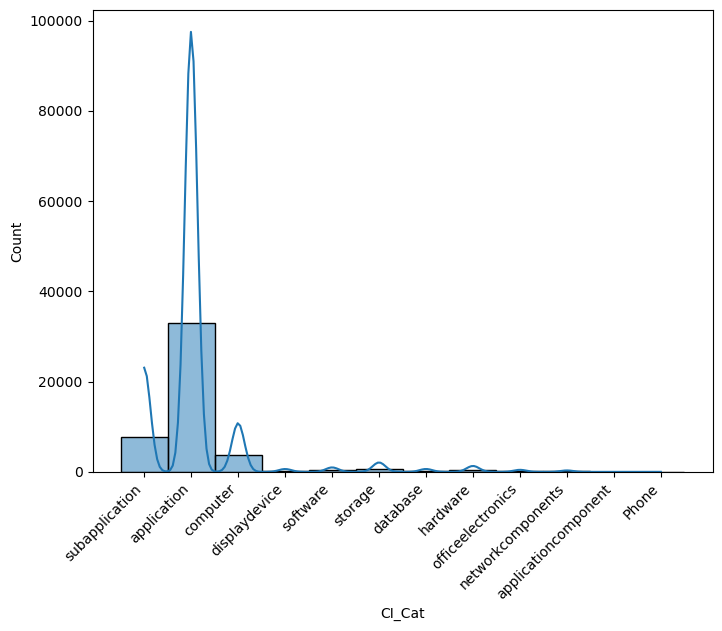

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['CI_Cat'], kde=True)
#sns.histplot(data=data, x=data["CI_Cat"],order=data["CI_Cat"].value_counts().index,kde=true)
plt.xticks(rotation=45,ha="right")

* The majority of the data is between 0 and 600.
* There are a few outliers at the high end.
* The median is slightly higher than the mode, which suggests that the data is somewhat skewed to the right.

In [21]:
data["CI_Cat"].mode()

0    application
Name: CI_Cat, dtype: object

In [22]:
data.CI_Cat.unique()
data.CI_Cat.value_counts()

CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64

In [23]:
data.loc[data["CI_Cat"].isnull()==True,"CI_Cat"]="application"

In [24]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                       111
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
No_of_Reassignments               1
Reopen_Time                   44322
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

### **Replacing Null Values for CI_Subcat**

In [25]:
data[data["CI_Subcat"].isnull()]["CI_Subcat"]

316      NaN
538      NaN
593      NaN
670      NaN
1128     NaN
        ... 
34462    NaN
34868    NaN
36150    NaN
38262    NaN
38429    NaN
Name: CI_Subcat, Length: 111, dtype: object

<Axes: xlabel='CI_Subcat', ylabel='Count'>

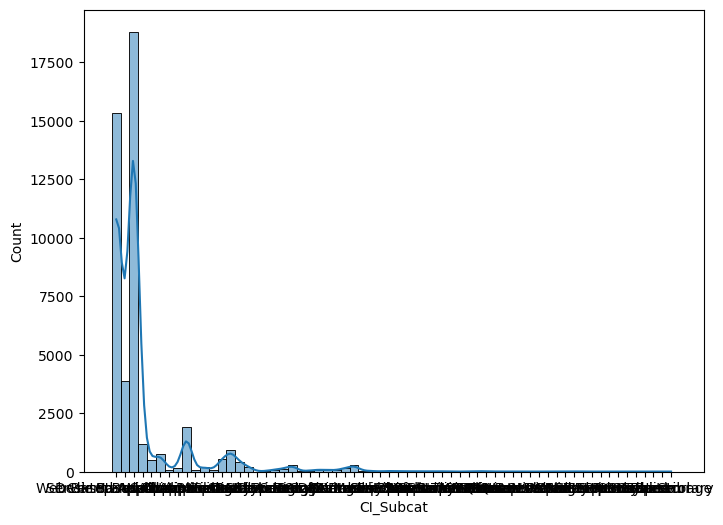

In [26]:


plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['CI_Subcat'], kde=True)

* The distribution of the CI_Subcat column is skewed to the right.
* There is a small number of outliers at the high end, representing CI_Subcat values of In Progress and Not Started.

In [27]:
data["CI_Subcat"].mode()

0    Server Based Application
Name: CI_Subcat, dtype: object

In [28]:
data.CI_Subcat.unique()
data.CI_Subcat.value_counts()

CI_Subcat
Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
                            ...  
VMWare                          1
Application Server              1
NonStop Storage                 1
Protocol                        1
Security Software               1
Name: count, Length: 64, dtype: int64

In [29]:
data.loc[data["CI_Subcat"].isnull()==True,"CI_Subcat"]="Server Based Application"

In [30]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
No_of_Reassignments               1
Reopen_Time                   44322
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

### **Replacing Null Values for Priority**

In [31]:
data[data["Priority"].isnull()]["Priority"]

2       NaN
8       NaN
103     NaN
147     NaN
152     NaN
         ..
46424   NaN
46446   NaN
46484   NaN
46553   NaN
46590   NaN
Name: Priority, Length: 1380, dtype: float64

<Axes: xlabel='Priority', ylabel='Count'>

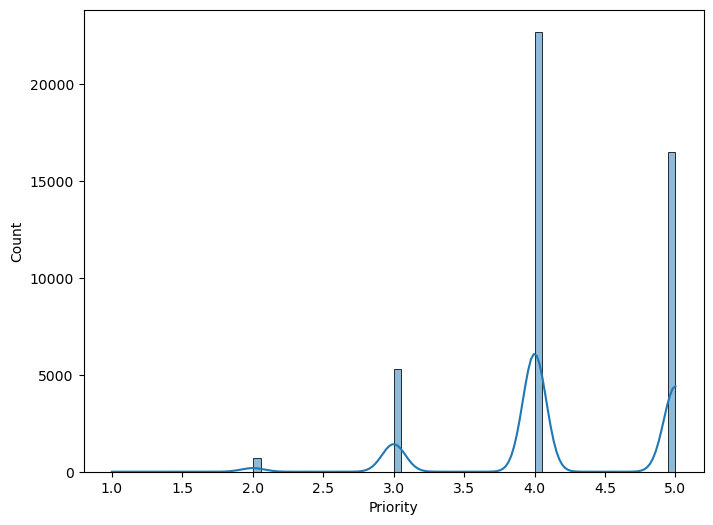

In [32]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['Priority'], kde=True)

* The distribution of the data is skewed to the right, with most values between 20 and 50.
* There are a few outliers at the high end, with values above 100.

In [33]:
data["Priority"].median()

4.0

In [34]:
data["Priority"].mode()

0    4.0
Name: Priority, dtype: float64

In [35]:
data.loc[data["Priority"].isnull()==True,"Priority"]=4.0

In [36]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               1
Reopen_Time                   44322
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

In [37]:
data.sample(10)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Reopen_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
4360,application,Server Based Application,Closed,5,5,5.0,0.086909,incident,0.0,NaN,Software,1.0,NaN,NaN
24807,computer,Omgeving,Closed,4,4,4.0,0.667084,incident,0.0,NaN,Other,1.0,NaN,NaN
248,application,Web Based Application,Closed,4,4,4.0,0.187792,incident,4.0,NaN,Other,1.0,NaN,NaN
42165,database,Database,Closed,3,3,3.0,0.514197,incident,0.0,NaN,User error,1.0,NaN,NaN
6185,computer,Banking Device,Closed,4,4,4.0,0.834641,incident,1.0,NaN,Hardware,1.0,NaN,NaN
19435,application,Web Based Application,Closed,4,4,4.0,0.372640,incident,0.0,NaN,Other,1.0,NaN,NaN
9900,application,Server Based Application,Closed,5,5,5.0,0.218188,request for information,0.0,NaN,No error - works as designed,1.0,NaN,NaN
36613,application,Desktop Application,Closed,5,5,5.0,0.840995,request for information,0.0,NaN,Data,1.0,NaN,NaN
43755,application,Server Based Application,Closed,3,3,3.0,0.668521,incident,0.0,NaN,Other,1.0,NaN,NaN
39244,computer,Windows Server,Closed,4,4,4.0,0.618730,incident,5.0,NaN,Unknown,1.0,NaN,NaN


### **Remove the row with the null value for No_of_Reassignments**

In [38]:
# Remove the row with the null value in the 'No_of_Reassignments' column
data = data.dropna(subset=['No_of_Reassignments'])

In [39]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Reopen_Time                   44321
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45383
No_of_Related_Changes         46045
dtype: int64

### **Replacing Null Values for Closure_Code**

In [40]:
data[data["Closure_Code"].isnull()]["Closure_Code"]

9275     NaN
9488     NaN
9698     NaN
9989     NaN
10045    NaN
        ... 
46077    NaN
46247    NaN
46291    NaN
46357    NaN
46413    NaN
Name: Closure_Code, Length: 460, dtype: object

<Axes: xlabel='Closure_Code', ylabel='Count'>

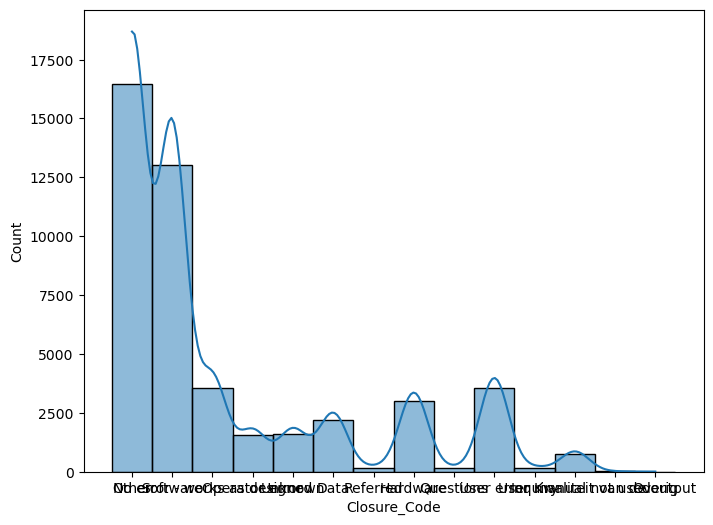

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['Closure_Code'], kde=True)

In [42]:
data["Closure_Code"].mode()

0    Other
Name: Closure_Code, dtype: object

In [43]:
data.Closure_Code.unique()
data.Closure_Code.value_counts()

Closure_Code
Other                           16470
Software                        13026
User error                       3554
No error - works as designed     3530
Hardware                         2999
Data                             2209
Unknown                          1590
Operator error                   1539
User manual not used              765
Inquiry                           162
Referred                          158
Questions                         132
Kwaliteit van de output            10
Overig                              1
Name: count, dtype: int64

In [44]:
data.loc[data["Closure_Code"].isnull()==True,"Closure_Code"]="other"

In [45]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Reopen_Time                   44321
Closure_Code                      0
No_of_Related_Interactions      114
No_of_Related_Incidents       45383
No_of_Related_Changes         46045
dtype: int64

## **Replacing Null Values for No_of_Related_Interactions**

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      46605 non-null  object 
 1   CI_Subcat                   46605 non-null  object 
 2   Status                      46605 non-null  object 
 3   Impact                      46605 non-null  object 
 4   Urgency                     46605 non-null  object 
 5   Priority                    46605 non-null  float64
 6   number_cnt                  46605 non-null  float64
 7   Category                    46605 non-null  object 
 8   No_of_Reassignments         46605 non-null  float64
 9   Reopen_Time                 2284 non-null   object 
 10  Closure_Code                46605 non-null  object 
 11  No_of_Related_Interactions  46491 non-null  float64
 12  No_of_Related_Incidents     1222 non-null   float64
 13  No_of_Related_Changes       560 non-

In [47]:
data.No_of_Related_Interactions.isnull().sum()

114

In [48]:
data.No_of_Related_Interactions.unique()
data.No_of_Related_Interactions.value_counts()

No_of_Related_Interactions
1.0      43057
2.0       2736
3.0        429
4.0        124
5.0         30
6.0         16
7.0         12
8.0          6
12.0         6
9.0          5
20.0         5
13.0         4
42.0         3
22.0         3
19.0         3
10.0         3
15.0         3
39.0         2
26.0         2
11.0         2
33.0         2
44.0         2
17.0         2
16.0         2
14.0         2
23.0         2
45.0         2
18.0         2
34.0         2
29.0         2
28.0         2
55.0         1
43.0         1
25.0         1
27.0         1
370.0        1
40.0         1
37.0         1
57.0         1
118.0        1
24.0         1
74.0         1
41.0         1
30.0         1
88.0         1
31.0         1
54.0         1
288.0        1
21.0         1
Name: count, dtype: int64

In [49]:
#data[data["No_of_Related_Interactions"].isnull()]["No_of_Related_Interactions"]#data[data["No_of_Related_Interactions"].isnull()]["No_of_Related_Interactions"]

<Axes: xlabel='No_of_Related_Interactions', ylabel='Count'>

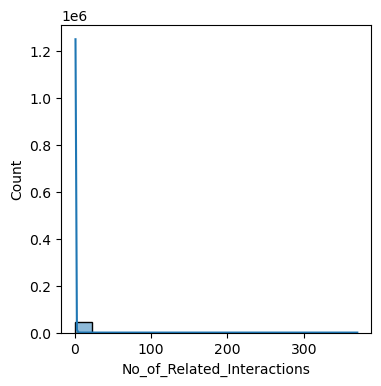

In [50]:
plt.figure(figsize=(4,4))
sns.histplot(data=data, x=data['No_of_Related_Interactions'], kde=True)

In [51]:
data["No_of_Related_Interactions"].median()

1.0

In [52]:
data["No_of_Related_Interactions"].mode()

0    1.0
Name: No_of_Related_Interactions, dtype: float64

In [53]:
data.loc[data["No_of_Related_Interactions"].isnull()==True,"No_of_Related_Interactions"]=1.0

In [54]:
data.No_of_Related_Interactions.isnull().sum()

0

## Check the Missing Values in percentage

In [55]:
data.isnull().sum()/len(data)*100

CI_Cat                         0.000000
CI_Subcat                      0.000000
Status                         0.000000
Impact                         0.000000
Urgency                        0.000000
Priority                       0.000000
number_cnt                     0.000000
Category                       0.000000
No_of_Reassignments            0.000000
Reopen_Time                   95.099238
Closure_Code                   0.000000
No_of_Related_Interactions     0.000000
No_of_Related_Incidents       97.377964
No_of_Related_Changes         98.798412
dtype: float64

Here, The Data shows Reopen Time,No of Related Interactions and No of Related Changes are above 95% of missing values. so we drop these columns.

In [56]:
data.drop("No_of_Related_Changes",axis=1,inplace=True)

In [57]:
data.drop("No_of_Related_Incidents",axis=1,inplace=True)

In [58]:
data.drop("Reopen_Time",axis=1,inplace=True)

In [59]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'No_of_Reassignments', 'Closure_Code',
       'No_of_Related_Interactions'],
      dtype='object')

## Check for Outliers

In [60]:
num_data=data.select_dtypes(include=["int64","float64"]).columns

In [61]:
num_data

Index(['Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions'],
      dtype='object')

In [62]:
cat_data

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Category',
       'Alert_Status', 'Reopen_Time', 'Closure_Code'],
      dtype='object')

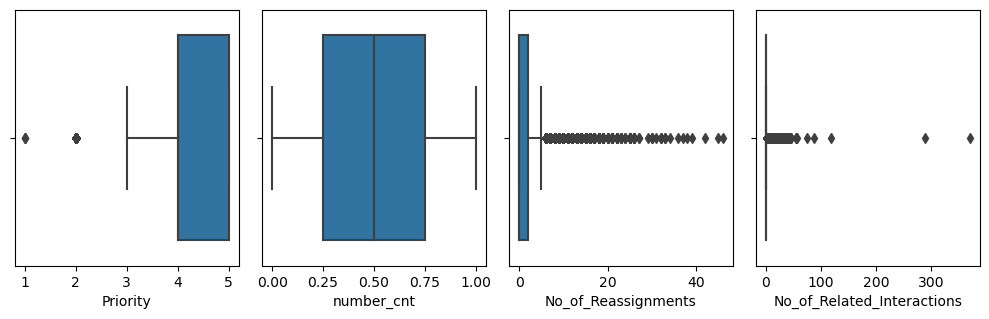

In [63]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in num_data:
  if plotnumber<8:
    ax=plt.subplot(2,4,plotnumber)
    sns.boxplot(x=data[col])
    plt.xlabel(col,fontsize=10)

  plotnumber+=1
plt.tight_layout()

### Box Plot for number_cnt

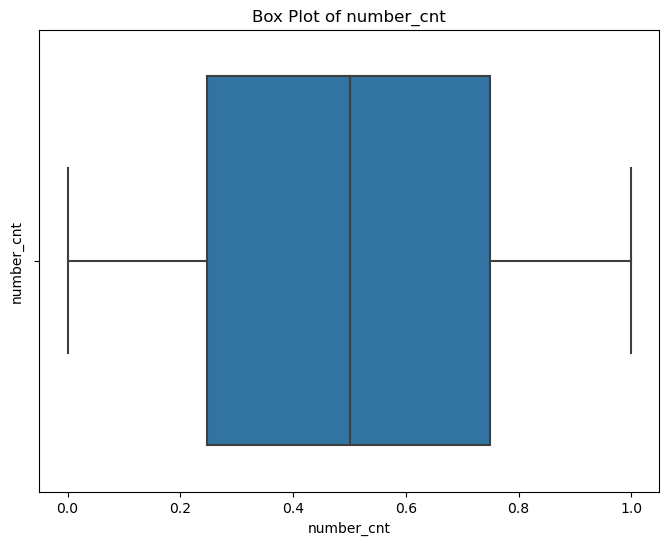

In [64]:
# Create a box plot for the 'number_cnt' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['number_cnt'])
plt.title('Box Plot of number_cnt')
plt.ylabel('number_cnt')
plt.show()


### Box Plot for No_of_Reassignements

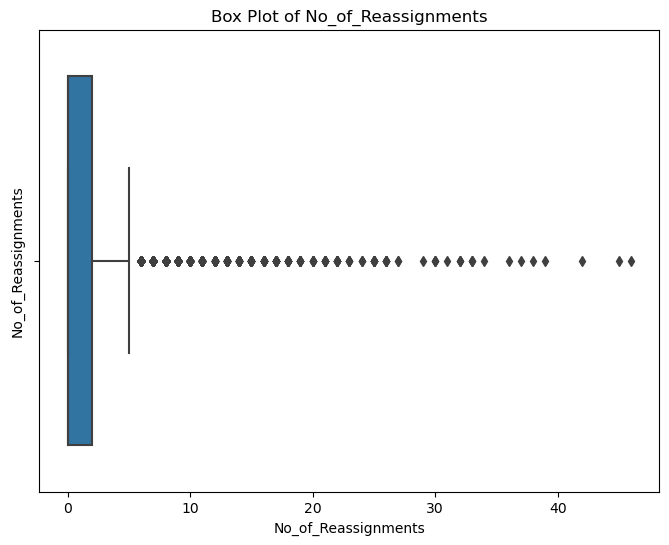

In [66]:
# Create a box plot for the 'number_cnt' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['No_of_Reassignments'])
plt.title('Box Plot of No_of_Reassignments')
plt.ylabel('No_of_Reassignments')
plt.show()

<Axes: xlabel='No_of_Reassignments', ylabel='Count'>

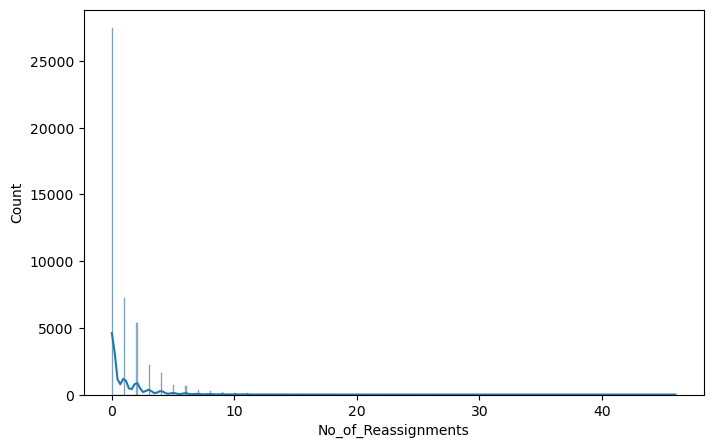

In [67]:
# Outliers handle
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Reassignments',kde=True)

### **Insights**
* Most tickets (0 reassignments) are resolved without being reassigned.
* Reassignments decrease exponentially.
* There is a small peak at 3 reassignments.
* The graph is skewed to the right, meaning more tickets have a few reassignments than many reassignments.

In [68]:
Q1=data["No_of_Reassignments"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Reassignments"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 0.0
upper_quartile 2.0


In [69]:
IQR=Q3-Q1
IQR

2.0

In [70]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is -3.0
upper_limit is 5.0


In [71]:
data.loc[data["No_of_Reassignments"]>upper_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
0,subapplication,Web Based Application,Closed,4,4,4.0,0.601292,incident,26.0,Other,1.0
1,application,Web Based Application,Closed,3,3,3.0,0.415050,incident,33.0,Software,1.0
3,application,Web Based Application,Closed,4,4,4.0,0.642927,incident,13.0,Operator error,1.0
10,application,Web Based Application,Closed,4,4,4.0,0.439909,incident,6.0,Software,1.0
11,application,Web Based Application,Closed,4,4,4.0,0.291928,incident,8.0,Software,1.0
...,...,...,...,...,...,...,...,...,...,...,...
44961,application,Server Based Application,Closed,3,3,3.0,0.267787,incident,10.0,Other,2.0
45040,application,Server Based Application,Closed,5,5,5.0,0.680022,incident,6.0,Software,1.0
45196,application,Server Based Application,Closed,4,4,4.0,0.449103,incident,7.0,Other,1.0
45273,application,Desktop Application,Closed,4,4,4.0,0.166302,incident,8.0,Software,1.0


In [72]:
len(data.loc[data["No_of_Reassignments"]>upper_limit])/len(data)

0.042334513464220576

In [73]:
data.loc[data["No_of_Reassignments"]>upper_limit,"No_of_Reassignments"]=data["No_of_Reassignments"].median()

<Axes: xlabel='No_of_Reassignments'>

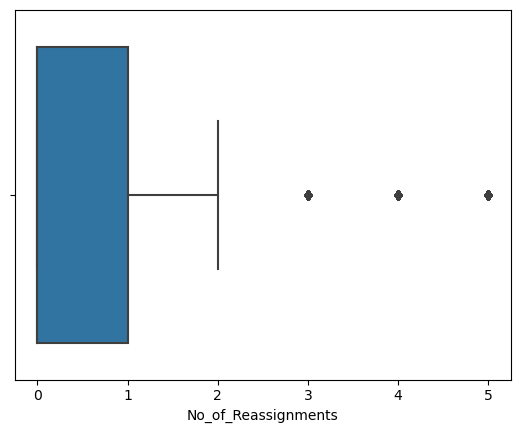

In [74]:
sns.boxplot(x=data.No_of_Reassignments)

### For No_of_realted_interactions

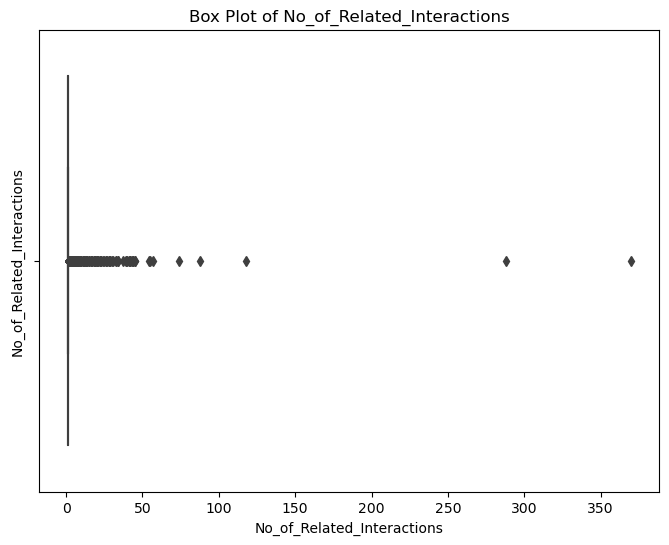

In [75]:
# Create a box plot for the 'No_of_Related_Interactions' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['No_of_Related_Interactions'])
plt.title('Box Plot of No_of_Related_Interactions')
plt.ylabel('No_of_Related_Interactions')
plt.show()

<Axes: xlabel='No_of_Related_Interactions', ylabel='Count'>

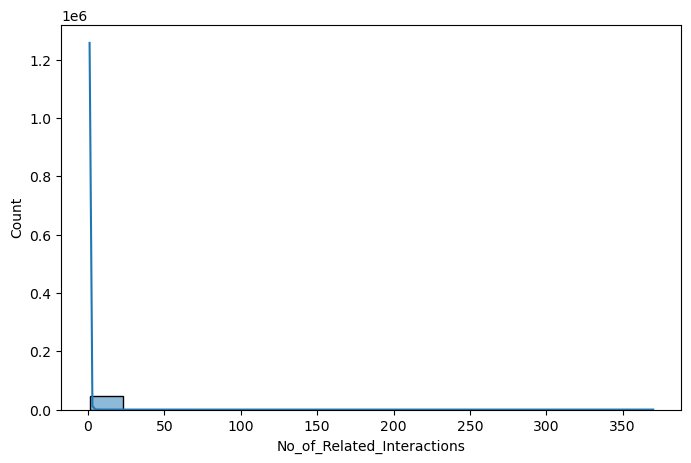

In [76]:
# Outliers Handled
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Related_Interactions',kde=True)

### **Insights**
* Most tickets (0 reassignments) are resolved without being reassigned.
* Reassignments decrease exponentially.
* There is a small peak at 3 reassignments.
* The graph is skewed to the right, meaning more tickets have a few reassignments than many reassignments.

In [77]:
Q1 = data["No_of_Related_Interactions"].quantile(0.25)
print("lower_quantile",Q1)
Q3 = data["No_of_Related_Interactions"].quantile(0.75)
print("upper_quantile",Q3)

lower_quantile 1.0
upper_quantile 1.0


In [78]:
IQR=Q3 - Q1
IQR

0.0

In [79]:
lower_limit = Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit = Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 1.0


In [80]:
data.loc[data["No_of_Related_Interactions"]>upper_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions
12,application,Web Based Application,Closed,4,4,4.0,0.776486,incident,5.0,Software,2.0
18,application,Desktop Application,Closed,3,3,3.0,0.860255,incident,0.0,Other,2.0
19,application,Web Based Application,Closed,5,5,5.0,0.663615,incident,5.0,Other,2.0
27,application,Server Based Application,Closed,5,5,5.0,0.748361,request for information,0.0,No error - works as designed,2.0
29,application,Server Based Application,Closed,5,5,5.0,0.853722,request for information,2.0,Other,2.0
...,...,...,...,...,...,...,...,...,...,...,...
46455,application,Server Based Application,Closed,4,4,4.0,0.175887,incident,1.0,Other,2.0
46458,application,Server Based Application,Closed,5,5,5.0,0.969598,incident,0.0,Software,2.0
46460,application,Server Based Application,Closed,5,3,4.0,0.628989,incident,0.0,Software,2.0
46471,application,Server Based Application,Closed,5,5,5.0,0.280788,incident,0.0,Software,2.0


In [81]:
data.loc[data["No_of_Related_Interactions"]<lower_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions


<Axes: xlabel='No_of_Related_Interactions'>

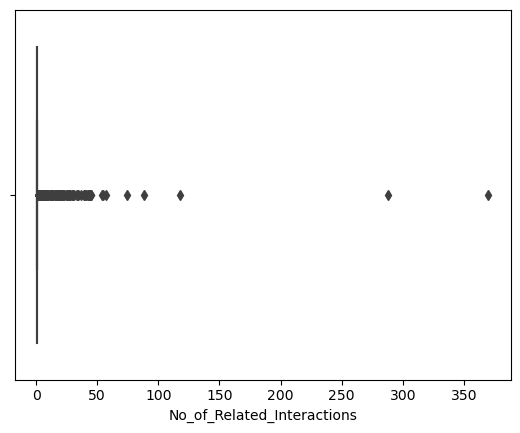

In [82]:
sns.boxplot(x=data.No_of_Related_Interactions)

* Median number of related interactions is 1.
* 75% of tickets have 3 or fewer related interactions.
* There are a few outliers with many related interactions (up to 20).
